In [1]:
%%html
<style>
table {
    margin-left: 30pt !important;
    margin-right: auto !important;
    display: block;
}
</style>

<a id='top'></a>

# Code to generate Figure panels related to Figure 1

#### Goldschmidt et al. 2026, "Recent experience and internal state shape local search strategies in flies"
---

<a id='toc'></a>
## Table of Contents

- [Imports](#imports)
- [Figure 1](#figure-1)

| Figure Panel  | Title | Status |
| ------------- | ------------- | :-----------: |
| [Fig. 1A/B](#fig-1b)  | Example trajectory of a 24-h-starved fly color coded by the assigned segment type |✅|
| [Fig. 1C](#fig-1c)  | Cumulative feeding for 24-h-starved wildtype flies |✅|
| [Fig. 1Di/ii](#fig-1d)  | Average fraction per minute that flies spent a given behavioral segment   |✅|
| [Fig. 1E](#fig-1e)  | Illustration of annotated loops  |✅|
| [Fig. 1F](#fig-1f)  | Strip plot of the maximum distance from the food that was reached in each loop as function of binned loop number  |✅|
| [Fig. 1G](#fig-1g)  | Boxplot showing the fraction of the trial time that flies spent in the different segments  |✅|
| [Fig. 1H](#fig-1h)  | Linear regression of maximum distance from the food as function of the loop number  |✅|

- [Supplemental Figure 1](#figure-s1)

| Figure Panel  | Title | Status |
| ------------- | ------------- | :-----------: |
| [Fig. S1A](#fig-1b)  | Cumulative feeding for 40-h-starved wildtype flies  |✅|
| [Fig. S1B](#fig-s1b)  | Boxplot of accumulated feeding as function of binned loop number for 24-h- and 40-h-starved flies |✅|
| [Fig. S1C](#fig-s1c)  | Linear regression plot of the maximum distance to the food as function of loop number for 24-h-starved flies  |✅|
| [Fig. S1D](#fig-s1d)  | Linear regression plot of the maximum distance to the food as function of loop number for 40-h-starved flies  |✅|
| [Fig. S1E](#fig-s1e)  |  Strip- and boxplot showing regression slope values (see C-D) binned by the duration of starvation  |✅|
| [Fig. S1F](#fig-s1f)  | Scatterplot of loop number vs the logarithm of the maximum radial loop distance  |✅|
| [Fig. S1G](#fig-s1b)  | Boxplot of loop path lengths as function of binned loop number for 24-h- and 40-h-starved flies  |✅|
| [Fig. S1H/I](#fig-s1h)  | Accumulated feeding of 24-h-starved (H) and 40-h-starved flies (I) aligned to the time since the first visit  |✅|

- [Data S1 Figure 1](#dataS1-figure-1)

| Figure Panel  | Title | Status |
| ------------- | ------------- | :-----------: |
| [Data S1 Fig. 1A](#dataS1-fig-1a)  | Total duration of feeding visits in minutes for 24-h-starved and 40-h-starved flies  |✅|
| [Data S1 Fig. 1B](#dataS1-fig-1b)  | Scatterplot of number of feeding visits vs. mean duration of food visits |✅|
| [Data S1 Fig. 1C](#dataS1-fig-1c)  | Mean duration of feeding visits in seconds for 24-h-starved and 40-h-starved flies  |✅|
| [Data S1 Fig. 1D](#dataS1-fig-1d)  | Number of feeding visits for 24-h-starved and 40-h-starved flies  |✅|
| [Data S1 Fig. 1E](#dataS1-fig-1e)  | Number of feeding encounters for 24-h-starved and 40-h-starved flies  |✅|
| [Data S1 Fig. 1F](#dataS1-fig-1f)  | Probability to engage for 24-h-starved and 40-h-starved flies  |✅|

<a id='imports'></a>
## Imports

In [33]:
import numpy as np
import pandas as pd
import os
import os.path as op
import matplotlib.pyplot as plt
import seaborn as sns

from src.helper import rle, read_yaml
from src.viz import seg_label, etho_label, seg_color, etho_color, myAxisTheme, plotArenaAndFood, stripWithBoxplot, stripWithBoxplot_color, cond_color
from src.makedataframe import getDataPerGroup, makeLoopDf, makeLoopDepartureStatsDf
from src.per_fly import get_fly_df

import matplotlib
from matplotlib import rcParams
rcParams['pdf.fonttype'] = 42
plt.rcParams['svg.fonttype'] = 'none' ## this is to avoid text to path in svg 
%config Completer.use_jedi = False
pd.options.mode.chained_assignment = None
loopcmap = "gnuplot_r"
timecmap = "crest"

<a id='figure-1'></a>
## Figure 1
### Load figure-specific datasets

In [5]:
rootDir = './dat/'
groupName = 'CantonSMH'

#example fly
flyID = 'fly04'

groups = {
    'CantonSMH': ['JR_CantonSMH_single_dark_5ul_perframe_0-125M_24hr',
        'JR_CantonSMH_single_dark_5ul_perframe_0-125M_40hr',
        'JR_CantonSMH_single_dark_5ul_perframe_0M_24hr',
        'JR_CantonSMH_single_dark_5ul_perframe_0M_40hr'],
}
files = groups[groupName]
plotDir = op.join('plt', groupName)
os.makedirs(plotDir, exist_ok=True)

# Load all segmented per-frame data
with np.errstate(divide='ignore'):
    datDf, metadata = getDataPerGroup(rootDir, files) 
conditions = list(np.unique(datDf.condition.values))
flyids = list(np.unique(datDf.flyid.values))

for cond in conditions:
    n=len(list(set(datDf.query(f'condition=="{cond}"').fly.values)))
    print(f'{cond}, n={n}')

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

/Users/golddenn/Documents/GitHub/2026-goldschmidt-et-al-currbiol/src/makedataframe.py:95: RuntimeWarning: invalid value encountered in divide
  datDf['cff'] = np.divide(datDf.fed.values, datDf.time.values)


In [7]:
# postprocessing of data
datDf['isnan'] = np.isnan(datDf.body_x)

maxDistFood = datDf.arenaRad.mean() + 10
timeJump = datDf.query('dt>30 & frame > 0')[['fly','condition','flyid']].drop_duplicates().reset_index(drop=True)
flyJump = datDf.query(f'distance_patch_0 > {maxDistFood} & frame > 0')[['fly','condition','flyid']].drop_duplicates().reset_index(drop=True)

# fix jumps by masking them with "nan"
for col in ['body_x','body_y','head_x','head_y','head_speed','body_speed','angular_speed','curvature','ethogram']:
    datDf.loc[datDf["distance_patch_0"]>=maxDistFood, col] = np.nan
lostFly = pd.DataFrame(pd.DataFrame(datDf.groupby(['condition','flyid','fly'])['isnan'].sum()).query('isnan > 500').to_records())
lostFly.sort_values(by = ['condition','flyid']).reset_index(drop=True)

,condition,flyid,fly,isnan
0,0-125M_24hr,fly24,bias_video_cam_0_date_2019_10_01_time_09_22_31...,2594


<a id='fig-1b'></a>
### Fig. 1A/B - Example trajectory of a 24-h-starved fly color coded by the assigned segment type

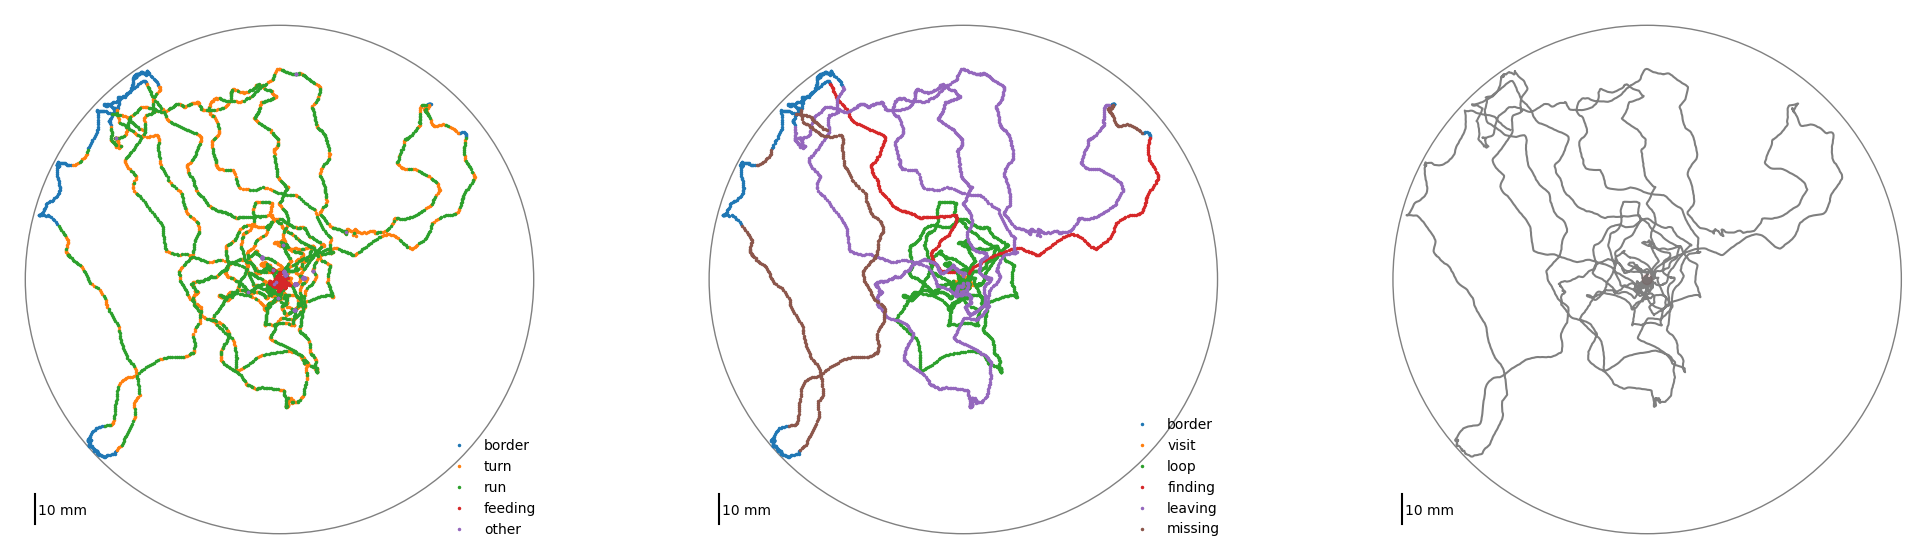

In [9]:
cond = list(datDf.condition.unique())[0]
plotDf = datDf.query(f'condition=="{cond}" & flyid=="{flyID}" & time < 823 & time > 400')
fig, axs = plt.subplots(1,3,figsize=(25,7))

states = np.unique(datDf.ethogram.values)
for st in states:
    if np.isnan(st): continue
    axs[0].plot(plotDf.body_x[plotDf.ethogram.values == st], plotDf.body_y[plotDf.ethogram.values == st],'.',
             markersize=3, label=etho_label[st])
axs[0].set_aspect('equal')
axs[0].legend(frameon=False)

segs = np.unique(datDf.segment.values)
for st in segs:
    if np.isnan(st): continue
    axs[1].plot(plotDf.body_x[plotDf.segment.values == st], plotDf.body_y[plotDf.segment.values == st],'.',
             markersize=3, label=seg_label[st])
axs[1].set_aspect('equal')
axs[1].legend(frameon=False)

axs[2].plot(plotDf.body_x, plotDf.body_y,color='k',alpha=0.5)

for ax in axs:
    ax.plot([-80,-80],[-80,-70],'k')
    ax.text(-79,-77,'10 mm')
    plotArenaAndFood(ax, foodRad=plotDf.food_r.values[0], arenaRad=plotDf.arenaRad.values[0],foodCol='firebrick')

fig.savefig(op.join(plotDir,f'trajectorySegmentationExample_fly{flyID}_Fig1AB.pdf'))

<a id='fig-1c'></a>
### Fig. 1C / Fig. S1A - Cumulative feeding for 24-h- and 40-h-starved wildtype flies

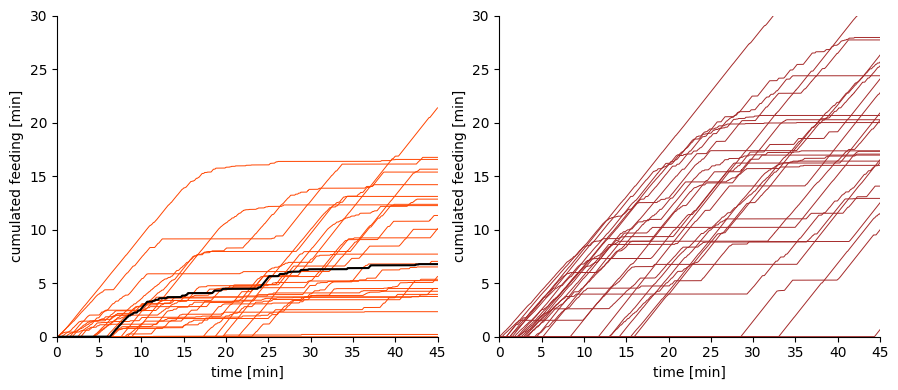

In [11]:
fig, axs = plt.subplots(1,2,figsize=(4.5*2,4))
for c, cond in enumerate(conditions[:2]):
    tmp = datDf.query(f'condition == "{cond}"')
    ax=axs[c]
    for fly in tmp.fly.unique():
        inds = np.where(tmp.query(f'fly == "{fly}"').dt.values < 0.05)[0]
        ax.plot(tmp.query(f'fly == "{fly}"').time.values[inds]/60, tmp.query(f'fly == "{fly}"').fed.values[inds]/60, color=cond_color[cond], linewidth=0.7)
    if c == 0:
        inds = np.where(tmp.query(f'flyid == "{flyID}"').dt.values < 0.05)[0]
        ax.plot(tmp.query(f'flyid == "{flyID}"').time.values[inds]/60, tmp.query(f'flyid == "{flyID}"').fed.values[inds]/60, color='k')
    ax.set_ylim(0,1800/60)
    ax.set_xlim(0,45)
    myAxisTheme(ax)
    ax.set_xlabel('time [min]')
    ax.set_ylabel('cumulated feeding [min]')
fig.tight_layout()
fig.savefig(op.join(plotDir,f'cumulativeFeeding_Fig1C-FigS1A_exFly{flyID}.pdf'))

<a id='fig-1d'></a>
### Fig. 1Di/Dii - Average fraction per minute that flies spent a given behavioral segment 

In [10]:
### define segment states
state_visit = 1
state_loop = 2
state_finding = 3
state_leaving = 4
maxn = 30
fps = 23.95

### calculate segment bins
segmentstoplot = [state_visit, state_loop,state_leaving]#,state_finding]
labs = ['Visits','Loops','Departures']#,'Finding']
dataarray = np.nan*np.ones((len(conditions), maxn, 55,len(segmentstoplot)))
bw_min = 5
bw = bw_min*60*fps
for i,cond in enumerate(conditions):
    #ax.set_ylabel(f'{cond}')
    rdf = datDf.loc[datDf.condition==cond]
    for j,fly in enumerate(rdf.fly.unique()):
        flydf = rdf.loc[rdf.fly==fly]
        try:
            firstfood = np.where((flydf.segment.values == state_visit).astype('int')>0)[0][0]
        except IndexError: pass
        dt = flydf.dt.values
        segment = flydf.segment.values
        for k in range(dataarray.shape[-2]):
            st = int(k*60*fps)
            dt_, segment_ = dt[st:int(st+bw)], segment[st:int(st+bw)]
            for s,seg in enumerate(segmentstoplot):
                aligned_k =  int((st-firstfood)/(60*fps))
                dataarray[i,j,aligned_k,s] = np.sum(dt_[segment_==seg])/(bw_min*60) ## per min

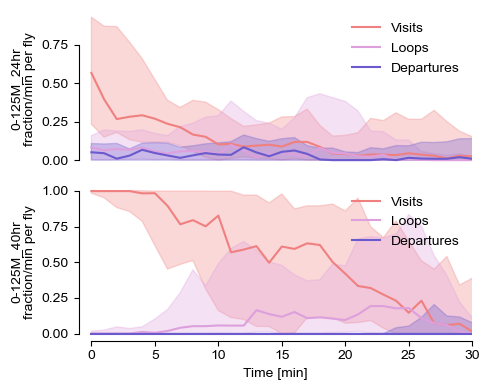

In [11]:
f,axs = plt.subplots(2,1,figsize=(5,4))
seg_color = {
    state_visit: 'lightcoral',
    state_loop: 'plum',
    state_leaving: 'slateblue',
    state_finding: 'dodgerblue',
}
for i,cond in enumerate(conditions[:2]):
    for s,seg in enumerate(segmentstoplot):
        y = np.nanmedian(dataarray[i,:,:,s], axis=0).squeeze()
        yerr_low = np.nanquantile(dataarray[i,:,:,s], q=.25, axis=0).squeeze()
        yerr_high = np.nanquantile(dataarray[i,:,:,s], q=.75, axis=0).squeeze()
        axs[i].plot(y, color=seg_color[seg], label=labs[s])
        axs[i].fill_between(np.arange(len(y)), yerr_low, yerr_high, color=seg_color[seg], alpha=.3)
    axs[i].set_xlim([-1,30]) #45-bw_min
    axs[i].set_ylabel(cond+'\n'+'fraction/min per fly')
    axs[i].legend(frameon=False)
    if i == len(axs)-1:
        sns.despine(ax=axs[i], trim=True)
    else:
        axs[i].get_xaxis().set_visible(False)
        sns.despine(ax=axs[i], trim=True, bottom=False)
        axs[i].spines['bottom'].set_visible(False)
    axs[i].set_xlabel('Time [min]')
f.tight_layout()
f.savefig(plotDir+sep+f'ethogramDynamics_fly{flyID}_Fig1D.pdf')

<a id='fig-1e'></a>
### Fig. 1E - Illustration of annotated loops

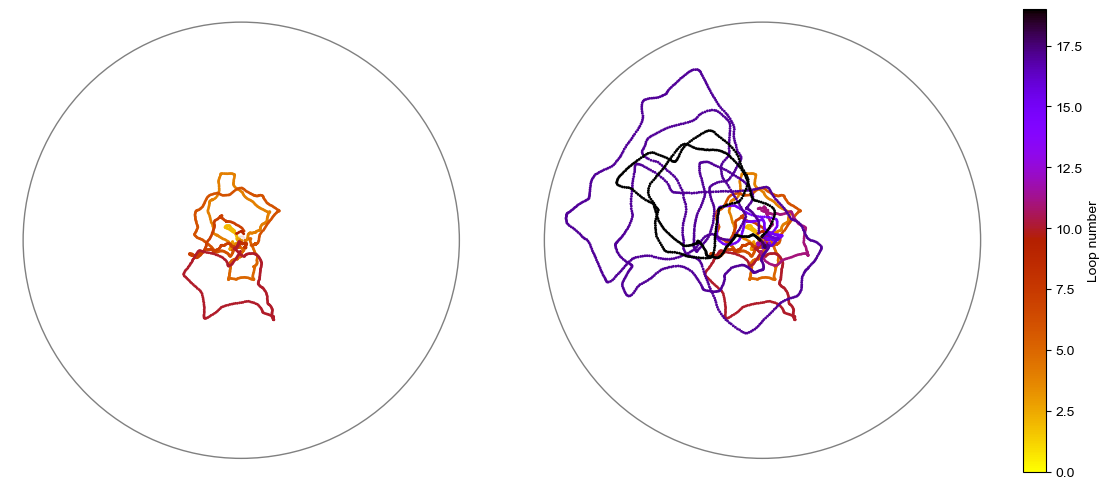

In [17]:
fig, axs = plt.subplots(1,2,figsize=(12,5))
plotDf = loopDf.query('condition=="{}" & flyid=="{}"'.format(list(datDf.condition.unique())[0],flyID))
n = plotDf.loopN.unique()[-1]
N = 10
axs[0].scatter(plotDf.query('loopN <= {}'.format(N)).body_x.values, plotDf.query('loopN <= {}'.format(N)).body_y.values,s=1,
               c=plotDf.query('loopN <= {}'.format(N)).loopN.values,cmap=loopcmap, vmin=0, vmax=n) 
plotArenaAndFood(axs[0], foodRad=plotDf.food_r.values[0], arenaRad=plotDf.arenaRad.values[0],foodCol='firebrick')

cb = axs[1].scatter(plotDf.body_x.values,plotDf.body_y.values,s=1,c=plotDf.loopN.values,cmap=loopcmap,vmin=0, vmax=n) 
plotArenaAndFood(axs[1], foodRad=plotDf.food_r.values[0], arenaRad=plotDf.arenaRad.values[0],foodCol='firebrick')
plt.colorbar(cb,label='Loop number')
fig.tight_layout()
fig.savefig(plotDir+sep+f'loopIllustration_{flyID}_Fig1E.pdf')

<a id='fig-1f'></a>
### Fig. 1F - Strip plot of the maximum distance from the food that was reached in each loop as function of binned loop number

#### Compute loop (and departure) statistics

In [12]:
numFeedBins = 10
myDistBins = [0,3,6,9,12,15,20,30,40,50,60]
myDistBins_even = list(np.arange(0,61,4))
myDistBins_farClose = [0,20,60]
loopBins = list(np.arange(1,52,4))
loopBinsShort = list(np.arange(1,32,3))
cffBins = np.linspace(-0.1,1,12)

with np.errstate(divide='ignore'):
    loopDf, loopDepDf = makeLoopDf(datDf)
loopDf['feedingBin'] = pd.cut(loopDf["normFed"],numFeedBins)

loopLenStats2 = pd.DataFrame(loopDf.groupby(['condition','flyid','loopN']).min()[['loop_time']].to_records())
loopLenStats = pd.DataFrame(loopDf.groupby(['condition','flyid','loopN']).max()[['loop_length','distance_patch_0','fed','normFed', 'deltaCFF']].to_records())
loopLenStats['pathLengthDistanceRatio'] = loopLenStats.loop_length/loopLenStats.distance_patch_0
loopLenStats['maxDistBin_uneven'] = pd.cut(loopLenStats["distance_patch_0"],bins=myDistBins, precision=1, right=False)
loopLenStats['maxDistBin'] = pd.cut(loopLenStats["distance_patch_0"],bins=myDistBins_even, precision=1, right=False)
loopLenStats['maxDistBin_farclose'] = pd.cut(loopLenStats["distance_patch_0"],bins=myDistBins_farClose, precision=1, right=False)
loopLenStats['deltaCFFBin'] = pd.cut(loopLenStats["deltaCFF"],bins=cffBins, precision=3,right=False)
loopLenStats['loopN_bin'] = pd.cut(loopLenStats["loopN"],bins=loopBins, precision=1,right=False)
loopLenStats['loopN_binShort'] = pd.cut(loopLenStats["loopN"],bins=loopBinsShort, precision=1,right=False)
loopLenStats['loopN_binShort_num'] = pd.cut(loopLenStats["loopN"],bins=loopBinsShort, precision=1, labels=False,right=False)
loopLenStats['loop_time'] = loopLenStats2.loop_time.values
display(loopLenStats.head())
loopdepStats = makeLoopDepartureStatsDf(datDf)
loopdepStats['feedingBin'] = pd.cut(loopdepStats["normFed"],numFeedBins, precision=0,right=False)
loopdepStats['maxDistBin'] = pd.cut(loopdepStats["maxDist"],bins=myDistBins_even, precision=1,right=False)
loopdepStats['maxDistBin_uneven'] = pd.cut(loopdepStats["maxDist"],bins=myDistBins, precision=1,right=False)
loopdepStats['maxDistBin_farClose'] = pd.cut(loopdepStats["maxDist"],bins=myDistBins_farClose, precision=1,right=False)
display(loopdepStats.head())

0-125M_24hr vs 0-125M_24hr: pval = 1.000e+00


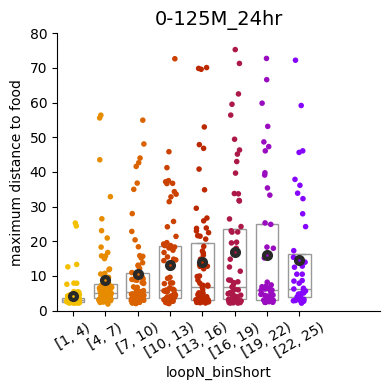

In [15]:
arenamax = 80
fig, ax = plt.subplots(1,1,figsize=(4,4))
cond = conditions[0]
plotDf = loopLenStats.query(f'condition=="{cond}" & loopN<=24').reset_index()[['loopN_binShort', 'distance_patch_0','condition']].dropna()
stripWithBoxplot(ax, plotDf, 'loopN_binShort', 'distance_patch_0', loopcmap , 'maximum distance to food', ylimvals=(-0.1, arenamax), dotsize=4)
ax.set_title(cond, fontsize=14)
myAxisTheme(ax)
fig.tight_layout()
fig.savefig(op.join(plotDir, 'scalingWithLoopNumberClipped_24h_Fig1F.pdf'))

<a id='fig-1g'></a>
### Fig. 1G - Boxplot showing the fraction of the trial time that flies spent in the different segments

In [22]:
conditions = list(np.unique(datDf.condition.values))
genotypes = list(np.unique(datDf.genotype.values))
groupvar = 'condition'
groupvars = conditions
mypal=cond_color
trialLen = 45
plotDf = datDf[[groupvar, 'flyid', 'segment','dt']].reset_index(drop=True)
plotDf = plotDf.assign(segname = lambda dataframe: dataframe['segment'].map(lambda segment: seg_label[segment]) )
timespentSeg = plotDf.groupby([groupvar,'flyid', 'segname']).sum()
timespentSeg['minutesTime'] = timespentSeg.dt.values/60.
timespentSeg['normTrialTime'] = timespentSeg.minutesTime.values/trialLen

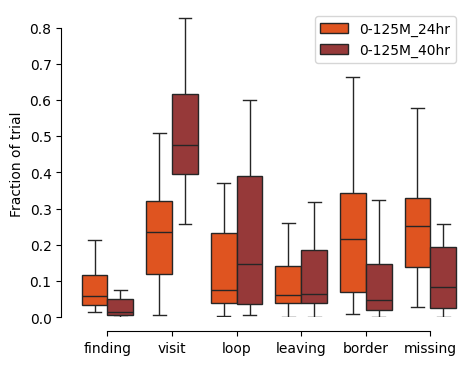

In [23]:
fig, axs = plt.subplots(1,1,figsize=(5,4))

sns.boxplot(x="segname", y="normTrialTime", data=timespentSeg.query(f'condition in {conditions[:2]}').reset_index(),  hue=groupvar,palette=mypal,ax=axs, 
            order=['finding','visit','loop','leaving','border','missing'], showfliers=False)
myAxisTheme(axs)
axs.legend()
axs.set_ylim(0,.85)
axs.set_xlabel('')
axs.set_ylabel('Fraction of trial')
sns.despine(offset=10, trim=True)
fig.savefig(op.join(plotDir, 'timeSpentOnSegment_Fig1G.pdf'))

<a id='fig-1h'></a>
### Fig. 1H - Linear regression of maximum distance from the food as function of the loop number

In [16]:
plotdata = loopLenStats.query('condition=="0-125M_24hr" or condition=="0-125M_40hr"').copy()
plotdata['combined_x'] = plotdata.normFed * plotdata.loopN/np.amax(plotdata.loopN)

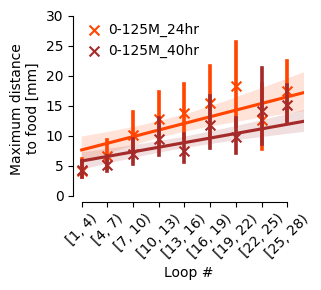

In [17]:
sns.lmplot(data=plotdata, x='loopN', y='distance_patch_0', hue='condition', palette=cond_color, x_bins=np.arange(1, 26, 3), x_estimator=np.mean, n_boot=10000,
    ci=99, markers= 'x', fit_reg=True, legend=False, height=3, aspect=1.1)
ax = plt.gca()
ax.set(xlabel='Loop #', ylabel='Maximum distance\nto food [mm]', xlim=[0,30], ylim=[-1,30])
ax.set_xticks(np.arange(1,26,3))
ax.set_xticklabels([f'[{el}, {el+3})' for el in np.arange(1,26,3)], rotation=45)
ax.set_xlim([0,27])
ax.legend(loc='upper left', frameon=False, handletextpad=0.01, borderpad=0.0)
sns.despine(ax=ax, trim=True)
plt.tight_layout()
plt.savefig(op.join(plotDir, 'corr_plot_binned_lmplot.pdf'))

<a id='figure-s1'></a>
## Supplemental Figure 1

<a id='fig-s1b'></a>
### Fig. S1B/G - Boxplot of accumulated feeding (B) and loop path lengths (G) as function of binned loop number for 24-h- and 40-h-starved flies

#### Compute convenience dataframes

In [24]:
distDf = pd.DataFrame(columns = ['condition','flyid','maxDistRange','loopCount','returnratio'])
for cond in conditions:
    conddf = loopdepStats.query('condition == "{}"'.format(cond))
    flies = list(conddf.flyid.unique())
    for fly in flies:
        for r in myDistBins[1:]: #[1:]
            flydf = conddf.query(f'segment == 2 & maxDist >= {r} & flyid =="{fly}"')
            #print(f'segment == 2 & maxDist >= {r} & flyid =="{fly}"')
            if len(flydf) == 0:
                tmp = pd.DataFrame.from_dict({'condition': [cond], 'flyid':[fly], 'loopCount':[0]})
            else:
                tmp = pd.DataFrame(flydf.groupby(['condition','flyid']).count().to_records())[['condition','flyid','maxDist']].rename(columns={'maxDist':'loopCount'})
            tmp['maxDistRange'] = r
            
            flydf = conddf.query('segment == 4 & maxDist >= {} & flyid =="{}"'.format(r, fly))
            if len(flydf) == 0:
                tmp2 = pd.DataFrame.from_dict({'condition': [cond], 'flyid':[fly], 'nDepartures':[0]})
            else:
                tmp2 = pd.DataFrame(flydf.groupby(['condition','flyid']).count().to_records())[['condition','flyid','maxDist']]
            tmp = (pd.merge(tmp, tmp2, on=['condition','flyid'])).rename(columns={'maxDist':'nDepartures'})
            tmp['allsegs'] = tmp.nDepartures + tmp.loopCount
            tmp = tmp[(tmp.allsegs > 0)]
            tmp['returnratio'] = tmp.loopCount.values/(tmp.loopCount.values + tmp.nDepartures.values)
            distDf = pd.concat([distDf,tmp])

loopDistCt = pd.DataFrame(loopdepStats.query('segment == 2').groupby(['condition','flyid','maxDistBin_uneven']).count().to_records())\
                [['condition','flyid','maxDistBin_uneven','segment']]
depDistCt = pd.DataFrame(loopdepStats.query('segment == 4').groupby(['condition','flyid','maxDistBin_uneven']).count().to_records())\
                [['condition','flyid','maxDistBin_uneven','segment']]
DistCt = (pd.merge(loopDistCt, depDistCt, on=['condition','flyid','maxDistBin_uneven'])).rename(columns={'segment_x':'loopCount','segment_y':'departureCount'})
DistCt['returnratio'] = DistCt.loopCount.values/(DistCt.loopCount.values+DistCt.departureCount.values)

/var/folders/_1/9_lwjkgx0cxdt5ckms78hbdm0000gr/T/ipykernel_18863/502246697.py:24: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  distDf = pd.concat([distDf,tmp])
/var/folders/_1/9_lwjkgx0cxdt5ckms78hbdm0000gr/T/ipykernel_18863/502246697.py:26: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loopDistCt = pd.DataFrame(loopdepStats.query('segment == 2').groupby(['condition','flyid','maxDistBin_uneven']).count().to_records())\
/var/folders/_1/9_lwjkgx0cxdt5ckms78hbdm0000gr/T/ipykernel_18863/502246697.py:28: FutureWarning: The default of observed=False is depr

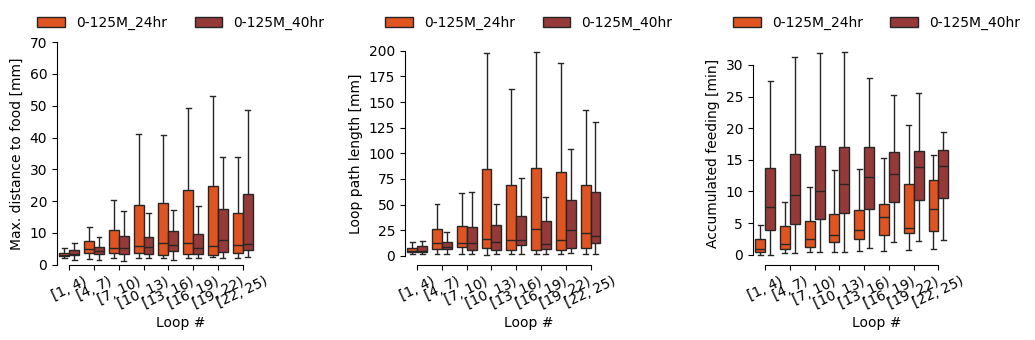

In [25]:
fig, axs = plt.subplots(1,3,figsize = (3.5*3,3.5))
labs = ['Max. distance to food [mm]','Loop path length [mm]', 'Accumulated feeding [min]']
mypal = cond_color

plotDf = loopLenStats.query(f'condition in {conditions[:2]} & loopN < 25').reset_index()
plotDf['fedmin'] = plotDf.fed.values*1/60
g = sns.boxplot(x='loopN_binShort', y='distance_patch_0', hue='condition', palette=mypal, ax=axs[0], data=plotDf,showfliers = False)
g = sns.boxplot(x='loopN_binShort', y='loop_length', hue='condition', showfliers = False, palette=mypal, ax=axs[1], data=plotDf)
g = sns.boxplot(x='loopN_binShort', y='fedmin', hue='condition', showfliers = False, palette=mypal, ax=axs[2], data=plotDf)

axs[0].set_ylim(0,70)
for j, ax in enumerate(axs[:]):
    ax.set_ylabel(labs[j])
    ax.set_xlabel('Loop #')
    ax.set_xticks(range(len(plotDf.loopN_binShort.unique()))) 
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 25);
    sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)
    sns.despine(ax=ax, trim=True)
fig.tight_layout()
fig.savefig(op.join(plotDir, 'loopscaling_WTcomparison_FigS1B-S1G.pdf'))

<a id='fig-s1c'></a>
### Fig. S1C - Linear regression plot of the maximum distance to the food as function of loop number for 24-h-starved flies

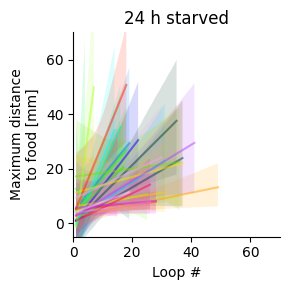

In [48]:
sns.lmplot(data=loopLenStats.query('condition=="0-125M_24hr"'), x='loopN', y='distance_patch_0', hue='flyid', palette='gist_ncar', line_kws=dict(alpha=0.5, lw=1.5), x_bins=np.arange(1, 26, 3),
    ci=99, n_boot=10000, markers="x", scatter=False, legend=False, fit_reg=True, truncate=True, height=3, aspect=1)
ax = plt.gca()
ax.set(xlabel="Loop #", ylabel='Maximum distance\nto food [mm]', title='24 h starved', xlim=[0,70], ylim=[-5,70])
plt.tight_layout()
plt.savefig(op.join(plotDir,'regressionslopes_FigS1C_24h.pdf'), dpi=300)

<a id='fig-s1d'></a>
### Fig. S1D - Linear regression plot of the maximum distance to the food as function of loop number for 40-h-starved flies

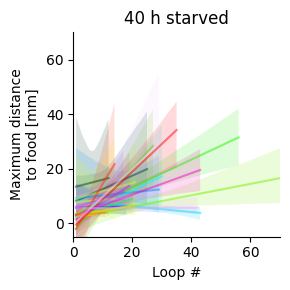

In [49]:
sns.lmplot(data=loopLenStats.query('condition=="0-125M_40hr"'), x='loopN', y='distance_patch_0', hue='flyid', palette='gist_ncar', line_kws=dict(alpha=0.5, lw=1.5), x_bins=np.arange(1, 26, 3),
    ci=99, n_boot=10000, markers="x", scatter=False, legend=False, fit_reg=True, truncate=True, height=3, aspect=1)
ax = plt.gca()
ax.set(xlabel="Loop #", ylabel='Maximum distance\nto food [mm]', title='40 h starved', xlim=[0,70], ylim=[-5,70])
plt.tight_layout()
plt.savefig(op.join(plotDir,'regressionslopes_FigS1D_40h.pdf'), dpi=300)

<a id='fig-s1e'></a>
### Fig. S1E - Strip- and boxplot showing regression slope values (see C-D) binned by the duration of starvation

In [53]:
import statsmodels.formula.api as smf
from scipy.stats import wilcoxon, ranksums, normaltest, ttest_ind, bws_test, brunnermunzel

df_slopes = loopLenStats.loc[loopLenStats.condition.str.contains('0-125M')].copy()
df_slopes['fly'] = df_slopes['condition'].str.split('_', expand=True)[1]+'_' + df_slopes['flyid'] 
param_df = {'fly':[], 'slope':[], 'condition': [], 'total_loops': []}
for fly in df_slopes.fly.unique():
    fly_df = df_slopes.query(f'fly == "{fly}"')
    model = smf.ols("distance_patch_0 ~ loopN", data=fly_df).fit()
    slope = model.params['loopN']
    param_df['fly'].append(fly)
    param_df['total_loops'].append(np.amax(fly_df.loopN))
    if '24hr' in fly_df.condition.unique()[0]:
        param_df['condition'].append('24 h')
    elif '40hr' in fly_df.condition.unique()[0]:
        param_df['condition'].append('40 h')
    param_df['slope'].append(slope)
param_df= pd.DataFrame(param_df)

24 h 19.0 4.5746564865112305e-06
normal: 39.90243373913252 2.1641960811237327e-09
40 h 4.0 2.086162567138672e-07
normal: 13.736702305223556 0.0010401907672398425


/var/folders/_1/9_lwjkgx0cxdt5ckms78hbdm0000gr/T/ipykernel_18863/1933685409.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=35)
/var/folders/_1/9_lwjkgx0cxdt5ckms78hbdm0000gr/T/ipykernel_18863/1933685409.py:96: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


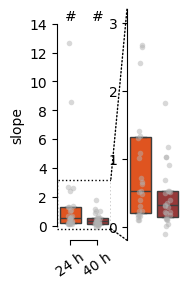

In [54]:
from scipy.stats import wilcoxon, normaltest
from matplotlib.patches import Rectangle, ConnectionPatch

# -------------------------------
# 1. Create the figure and axes
# -------------------------------
# We want each subplot to be half as wide as the original full-plot.
# To also allow extra space for the inset's x-axis elements, we use a slightly wider overall figure.
fig, (ax, axins) = plt.subplots(1, 2, figsize=(1.6, 3), gridspec_kw={'wspace': 0.3})

#############################
# 2. Main Plot (Left Panel)
#############################
sns.boxplot(data=param_df, x='condition', y='slope', hue='condition',
            palette=['orangered', 'brown'], fliersize=0, whis=False, ax=ax)
sns.stripplot(data=param_df, x='condition', y='slope', size=4,
              color='#b2b2b2', alpha=0.5, ax=ax)
ax.set(xlabel='', ylim=[-1, 15])
ax.set_xticklabels(ax.get_xticklabels(), rotation=35)
# (Keep the main plot's y-label; you can set it explicitly if desired.)
sns.despine(trim=True, ax=ax)

# Run statistical tests and annotate the main plot.
for i, cond in enumerate(param_df.condition.unique()):
    slopes = param_df.query(f'condition == "{cond}"').slope.values
    res = wilcoxon(slopes)
    print(cond, res.statistic, res.pvalue)
    ax.annotate('#',
                xy=(i, 14),
                xytext=(0, 0),
                textcoords='offset points',
                ha='center', va='bottom')
    res = normaltest(slopes)
    print('normal:', res.statistic, res.pvalue)

# Draw a dashed (dotted) rectangle on the main plot indicating the zoom region.
x_min, x_max = ax.get_xlim()
zoom_bottom, zoom_top = -0.2, 3.2
rect = Rectangle((x_min, zoom_bottom), x_max - x_min, zoom_top - zoom_bottom,
                 fill=False, linestyle='dotted', edgecolor='black')
ax.add_patch(rect)

######################################
# 3. Inset Plot (Right Panel – Zoomed View)
######################################
sns.boxplot(data=param_df, x='condition', y='slope', hue='condition',
            palette=['orangered', 'brown'], fliersize=0, whis=False, ax=axins)
sns.stripplot(data=param_df, x='condition', y='slope', size=4,
              color='#b2b2b2', alpha=0.5, ax=axins)

# Remove duplicate legend if present.
if axins.get_legend() is not None:
    axins.get_legend().remove()

# Set the zoomed y-limits and ticks.
axins.set_ylim(zoom_bottom, zoom_top)
axins.set_yticks([0, 1, 2, 3])
# (Leave the x-axis tick labels so that x-axis elements are visible.)
axins.set_xlabel('')
axins.get_xaxis().set_visible(False)
# Remove the y-label for the inset.
axins.set_ylabel('')

# Remove all spines except the left in the inset.
for spine in ['right', 'top', 'bottom']:
    axins.spines[spine].set_visible(False)

######################################
# 4. Connection Patches (Dashed Lines)
######################################
# We want to connect the right side of the dashed rectangle in the main plot
# to the left side of the inset’s data area—i.e. the left edge of the plotting area,
# which we obtain by transforming the point (0,0) in inset axes coordinates into data space.
main_right = x_max    # Right side of dashed rectangle on the main plot.
main_top = zoom_top
main_bottom = zoom_bottom

# Transform the left edge of the inset's drawing area from axes coordinates to data coordinates.
# In "axes coordinates", (0, y) is the left border of the plotting area (inside the tick labels).
inset_left_data = axins.transData.inverted().transform(axins.transAxes.transform((0, 0)))[0]
inset_top_data = axins.get_ylim()[1]
inset_bottom_data = axins.get_ylim()[0]

con_top = ConnectionPatch(xyA=(inset_left_data, inset_top_data), coordsA=axins.transData,
                          xyB=(main_right, main_top), coordsB=ax.transData,
                          arrowstyle="-", linestyle='dotted', color="black")
con_bot = ConnectionPatch(xyA=(inset_left_data, inset_bottom_data), coordsA=axins.transData,
                          xyB=(main_right, main_bottom), coordsB=ax.transData,
                          arrowstyle="-", linestyle='dotted', color="black")
fig.add_artist(con_top)
fig.add_artist(con_bot)

#############################
# 5. Final Adjustments and Save
#############################
plt.tight_layout()
plt.savefig(op.join(plotDir, 'slopes_box_all_FigS1E.pdf'), dpi=300)

<a id='fig-s1f'></a>
### Fig S1F - Scatterplot of loop number vs the logarithm of the maximum radial loop distance

0-125M_24hr
n=24
                            OLS Regression Results                            
Dep. Variable:               log_dist   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     49.54
Date:                Fri, 30 Jan 2026   Prob (F-statistic):           6.27e-12
Time:                        19:34:54   Log-Likelihood:                -254.63
No. Observations:                 514   AIC:                             513.3
Df Residuals:                     512   BIC:                             521.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6145      0.035   

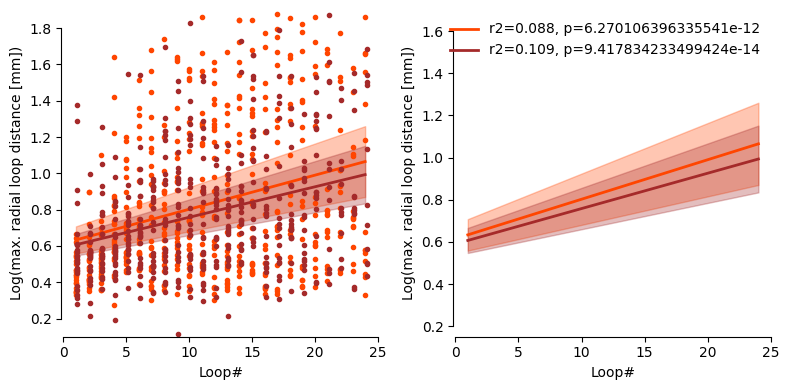

In [55]:
import statsmodels.formula.api as smf
fig, axs = plt.subplots(1,2, figsize=(8,4))    

for c,cond in enumerate(['0-125M_24hr', '0-125M_40hr']):
    print(cond)
    statsDf = loopLenStats.query(f'condition == "{cond}" & loopN < 25')[['flyid','loopN','distance_patch_0']]
    statsDf['log_dist'] = np.log10(statsDf.distance_patch_0)
    cts = statsDf.groupby('flyid').count().reset_index()
    slctflies = list(cts.query('loopN >= 10').flyid.values)
    print(f'n={len(slctflies)}')
    statsDf = statsDf.query(f'flyid in {slctflies}')

    axs[0].plot(statsDf.loopN+c/9, statsDf.log_dist,'.',color=cond_color[cond])
    model = smf.ols(formula='log_dist~loopN', data=statsDf).fit()
    p = model.params
    x = np.arange(1, 25)
    # plot regression line on the same axes, set x-axis limits
    civ = model.conf_int(alpha=0.05)
    axs[0].plot(x, p.Intercept + p.loopN*x,linewidth=2, color=cond_color[cond], label=f'r2={round(model.rsquared,3)}, p={model.pvalues.loopN}')
    axs[0].fill_between(x, civ[0].Intercept + civ[0].loopN*x, civ[1].Intercept + civ[1].loopN*x,alpha=0.3,color=cond_color[cond], label='')

    axs[1].plot(x, p.Intercept + p.loopN*x,linewidth=2, color=cond_color[cond], label=f'r2={round(model.rsquared,3)}, p={model.pvalues.loopN}')
    axs[1].fill_between(x, civ[0].Intercept + civ[0].loopN*x, civ[1].Intercept + civ[1].loopN*x,alpha=0.3,color=cond_color[cond], label='')
    print(model.summary())
    print('\n')

    
axs[0].set_ylim(0.1,1.9)
axs[1].set_ylim(0.15,1.7)
axs[1].legend(frameon=False)
for ax in axs:
    ax.set_xlabel('Loop#')
    ax.set_ylabel('Log(max. radial loop distance [mm])')
    sns.despine(trim=True, ax=ax)
fig.tight_layout()
fig.savefig(op.join(plotDir, 'loopscaling_groupComparison_linearReg_FigS1F.pdf'), dpi=300)

<a id='fig-s1h'></a>
### Fig S1H,I - Accumulated feeding of 24-h-starved (H) and 40-h-starved flies (I) aligned to the time since the first visit

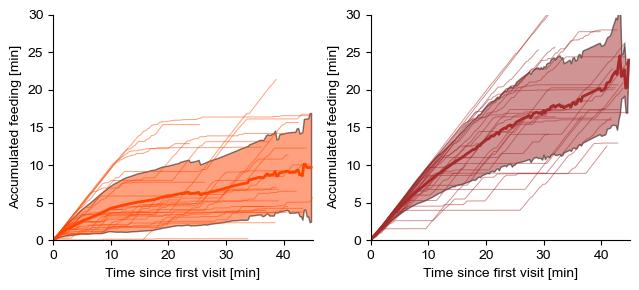

In [6]:
import matplotlib
matplotlib.rcParams['font.family'] = "sans-serif"
matplotlib.rcParams['font.sans-serif'] = "Arial"
conditions =  list(np.unique(datDf.condition.values))[:]
    
fig, axs = plt.subplots(1,2,figsize=(3.25*2,3))
for c, cond in enumerate(conditions[:2]):
    tmp = datDf.query(f'condition == "{cond}"')
    ax=axs[c]

    tdelta = 0.25
    T = 45
    mean_time = np.arange(0,T,tdelta)
    mean = np.zeros((len(tmp.fly.unique()), int(T/tdelta)))
    N = 0
    for i, fly in enumerate(tmp.fly.unique()):
        inds = np.where(tmp.query(f'fly == "{fly}"').dt.values < 0.05)[0]
        time = tmp.query(f'fly == "{fly}"').time.values[inds]/60
        fed = tmp.query(f'fly == "{fly}"').fed.values[inds]/60
        if len(np.where(fed > 0.0)[0])>0:
            N += 1
            first_time = time[np.where(fed > 0.0)[0][0]]
            norm_time = time-first_time
            ax.plot(norm_time, fed, color=cond_color[cond], linewidth=0.7, alpha=0.5)
            for j, tm in enumerate(mean_time):
                if len(fed[(norm_time>=tm)&(norm_time<tm+tdelta)])>0:
                    mean[i,j] = np.nanmean(fed[(norm_time>=tm)&(norm_time<tm+tdelta)])
                else:
                    mean[i,j] = np.nan
    ax.plot(mean_time, np.nanmean(mean, axis=0), color=cond_color[cond], linewidth=2)
    sigma = np.nanstd(mean, axis=0)
    ax.fill_between(mean_time, np.nanmean(mean, axis=0)+sigma, np.nanmean(mean, axis=0)-sigma, facecolor=cond_color[cond], edgecolor='k', alpha=0.5)
    ax.set_ylim(0,1800/60)
    ax.set_xlim(0,45)
    myAxisTheme(ax)
    ax.set_xlabel('Time since first visit [min]')
    ax.set_ylabel('Accumulated feeding [min]')
fig.tight_layout()
fig.savefig(op.join(plotDir,f'normcumulativeFeeding_std_FigS1HI.pdf'), dpi=300)

<a id='dataS1-figure-1'></a>
## Data S1 Figure 1

In [29]:
### per-fly analysis
per_fly_df = get_fly_df(datDf, metadata)

# folder to save figures
plotDir = './plt/dataS1_fig1'
os.makedirs(plotDir, exist_ok=True)

  0%|          | 0/4 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/26 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

<a id='dataS1-fig-1a'></a>
### Data S1 Fig. 1A - Total duration of feeding visits in minutes for 24-h-starved and 40-h-starved flies

pval = 3.854e-07


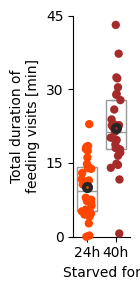

In [30]:
f,ax = plt.subplots(1,figsize=(1.5,3))

### sourcedata
per_fly_df['total_visit_min'] = per_fly_df['total_visit']/60. ## in minutes
dataS1fig1A_df = per_fly_df.loc[per_fly_df.condition.isin(['0-125M_24hr', '0-125M_40hr']), ['fly', 'condition', 'total_visit_min']]
dataS1fig1A_df.to_csv(op.join(plotDir,'sourcedata_datas1fig1A.csv'), index=False)

### plot
ax, stats = stripWithBoxplot(ax, dataS1fig1A_df, 'condition', 'total_visit_min', cond_color, 'Total duration of\nfeeding visits [min]')
ax.set_xticks([0,1])
ax.set_xticklabels(['24h', '40h'], rotation=0, ha='center')
ax.set_xlabel('Starved for')
ax.set_yticks(np.arange(0,46,15))
ax.set_ylim([0,45])
sns.despine(ax=ax, trim=False, bottom=False)
f.tight_layout()
f.savefig(op.join(plotDir,'plot_datas1fig1A.pdf'), dpi=300)

### stats
stats.to_csv(op.join(plotDir,'stats_datas1fig1A.csv'), index=False)

<a id='dataS1-fig-1b'></a>
### Data S1 Fig. 1B - Scatterplot of number of feeding visits vs. mean duration of food visits

/var/folders/_1/9_lwjkgx0cxdt5ckms78hbdm0000gr/T/ipykernel_18863/1988637849.py:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = matplotlib.cm.get_cmap('viridis')
/var/folders/_1/9_lwjkgx0cxdt5ckms78hbdm0000gr/T/ipykernel_18863/1988637849.py:22: RuntimeWarning: divide by zero encountered in divide
  ys = [total/xs for total in 60*totals]


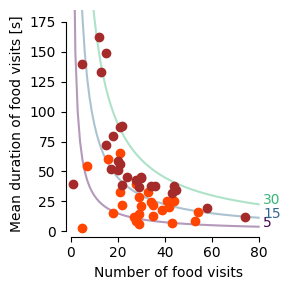

In [34]:
f,ax = plt.subplots(1,figsize=(2*1.5,3))

### sourcedata
dataS1fig1B_df = per_fly_df.loc[per_fly_df.condition.isin(['0-125M_24hr', '0-125M_40hr']), ['condition', 'fly', 'number_visit', 'mean_visit']]
dataS1fig1B_df.to_csv(op.join(plotDir,'sourcedata_datas1fig1B.csv'), index=False)

### plot
for cond in dataS1fig1B_df.condition.unique():
    x,y = dataS1fig1B_df.loc[dataS1fig1B_df.condition==cond,'number_visit'].values, dataS1fig1B_df.loc[dataS1fig1B_df.condition==cond,'mean_visit'].values
    ax.scatter(x,y, color=cond_color[cond])

# style axes
ax.set_ylim([-18.5/4,185])
ax.set_xlim([-8.5/4,85])
ax.set_ylabel('Mean duration of food visits [s]')
ax.set_xlabel('Number of food visits')

# draw isoclines
cmap = matplotlib.cm.get_cmap('viridis')
xs = np.arange(0,81,1.)
totals = np.array([5,15,30])
ys = [total/xs for total in 60*totals]
for i,y in enumerate(ys):
    rgba = cmap(i/len(ys))
    ax.plot(xs, y, color=rgba, alpha=0.4, zorder=0)
    ax.text(82, y[-1], f'{totals[i]}', color=rgba)

sns.despine(ax=ax, trim=True)
f.tight_layout()
f.savefig(op.join(plotDir,'plot_datas1fig1B.pdf'), dpi=300)

<a id='dataS1-fig-1c'></a>
### Data S1 Fig. 1C - Mean duration of feeding visits in seconds for 24-h-starved and 40-h-starved flies

(220.0, 2100.0)
pval = 7.043e-07
pval = 7.043e-07


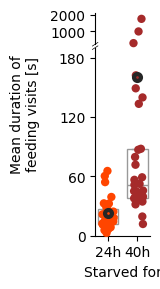

In [35]:
f,axes = plt.subplots(2,figsize=(1.75,3), height_ratios=(.5,3), sharex=True)

### sourcedata
dataS1fig1C_df = per_fly_df.loc[per_fly_df.condition.isin(['0-125M_24hr', '0-125M_40hr']), ['fly', 'condition', 'mean_visit']]
dataS1fig1C_df.to_csv(op.join(plotDir,'sourcedata_datas1fig1C.csv'), index=False)

### plot
for i, ax in enumerate(axes):
    if i == 1:
        ax, stats = stripWithBoxplot(ax, dataS1fig1C_df, 'condition', 'mean_visit', cond_color, '')
        ax.set_ylim([0,190]) # 190
        ax.set_yticks(np.arange(0,181,60))
        ax.set_xlabel('Starved for')
        ax.set_xticklabels(['24h', '40h'], rotation=0, ha='center')
        sns.despine(ax=ax, trim=False, bottom=False)
    else:
        ax.set_ylim([220,2100]) # 1880
        print(ax.get_ylim())
        ax, stats = stripWithBoxplot(ax, dataS1fig1C_df, 'condition', 'mean_visit', cond_color, '', clip=True)
        ax.set_yticks(np.arange(1000,2001,1000))
        ax.xaxis.set_visible(False)
        sns.despine(ax=ax, trim=False, bottom=True)

d = .05  # how big to make the diagonal lines in axes coordinates
e = 1.15
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=axes[0].transAxes, lw=0.5, color='k', clip_on=False)
axes[0].plot((-d, +d), (-e*d, +e*d), **kwargs)        # top-left diagonal
d = .05  # how big to make the diagonal lines in axes coordinates
e = 0.19
kwargs.update(transform=axes[1].transAxes)  # switch to the bottom axes
axes[1].plot((-d, +d), (1 - e*d, 1 + e*d), **kwargs)  # bottom-left diagonal

f.supylabel('Mean duration of\nfeeding visits [s]', y=0.6, x=.2, ha='center', fontsize=10)
f.tight_layout(h_pad=0.0)
f.savefig(op.join(plotDir,'plot_datas1fig1C.pdf'), dpi=300)

### stats
stats.to_csv(op.join(plotDir,'stats_datas1fig1C.csv'), index=False)

<a id='dataS1-fig-1d'></a>
### Data S1 Fig. 1D - Number of feeding visits for 24-h-starved and 40-h-starved flies

pval = 1.001e-01


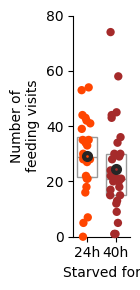

In [36]:
f,ax = plt.subplots(1,figsize=(1.5,3))

### sourcedata
dataS1fig1D_df = per_fly_df.loc[per_fly_df.condition.isin(['0-125M_24hr', '0-125M_40hr']), ['fly', 'condition', 'number_visit']]
dataS1fig1D_df.to_csv(op.join(plotDir,'sourcedata_datas1fig1D.csv'), index=False)

### plot
ax, stats = stripWithBoxplot(ax, dataS1fig1D_df, 'condition', 'number_visit', cond_color, 'Number of\nfeeding visits')
ax.set_xticklabels(['24h', '40h'], rotation=0, ha='center')
ax.set_xlabel('Starved for')
ax.set_yticks(np.arange(0,81,20.))
ax.set_ylim([0,80])
sns.despine(ax=ax, trim=False, bottom=False)
f.tight_layout()
f.savefig(op.join(plotDir,'plot_datas1fig1D.pdf'), dpi=300)

### stats
stats.to_csv(op.join(plotDir,'stats_datas1fig1D.csv'), index=False)

<a id='dataS1-fig-1e'></a>
### Data S1 Fig. 1E - Number of feeding encounters for 24-h-starved and 40-h-starved flies

pval = 1.906e-01


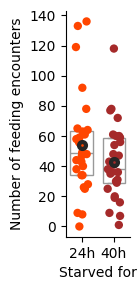

In [37]:
f,ax = plt.subplots(1,figsize=(1.5,3))

### sourcedata
dataS1fig1E_df = per_fly_df.loc[per_fly_df.condition.isin(['0-125M_24hr', '0-125M_40hr']), ['fly', 'condition', 'number_encounter']]
dataS1fig1E_df.to_csv(op.join(plotDir,'sourcedata_datas1fig1E.csv'), index=False)

### plot
ax, stats = stripWithBoxplot(ax, dataS1fig1E_df, 'condition', 'number_encounter', cond_color, 'Number of feeding encounters')
ax.set_xticklabels(['24h', '40h'], rotation=0, ha='center')
ax.set_xlabel('Starved for')
#ax.set_yticks(np.arange(0,46,15))
#ax.set_ylim([0,45])
sns.despine(ax=ax, trim=False, bottom=False)
f.tight_layout()
f.savefig(op.join(plotDir,'plot_datas1fig1E.pdf'), dpi=300)

### stats
stats.to_csv(op.join(plotDir,'stats_datas1fig1E.csv'), index=False)

<a id='dataS1-fig-1f'></a>
### Data S1 Fig. 1F - Probability to engage for 24-h-starved and 40-h-starved flies

pval = 3.416e-01


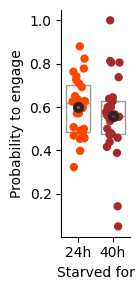

In [38]:
f,ax = plt.subplots(1,figsize=(1.5,3))

### sourcedata
per_fly_df['probability_engage'] = per_fly_df['number_visit']/per_fly_df['number_encounter'] 
dataS1fig1F_df = per_fly_df.loc[per_fly_df.condition.isin(['0-125M_24hr', '0-125M_40hr']), ['fly', 'condition', 'probability_engage']]
dataS1fig1F_df.to_csv(op.join(plotDir,'sourcedata_datas1fig1F.csv'), index=False)

### plot
ax, stats = stripWithBoxplot(ax, dataS1fig1F_df, 'condition', 'probability_engage', cond_color, 'Probability to engage')
ax.set_xticklabels(['24h', '40h'], rotation=0, ha='center')
ax.set_xlabel('Starved for')
sns.despine(ax=ax, trim=False, bottom=False)
f.tight_layout()
f.savefig(op.join(plotDir,'plot_datas1fig1F.pdf'), dpi=300)

### stats
stats.to_csv(op.join(plotDir,'stats_datas1fig1F.csv'), index=False)

## Save preprocessed data to file (WE MAY NOT NEED THIS..)

In [ ]:
distDf.to_csv(plotDir+sep+'distDf_{}.csv'.format(groupName))
loopdepStats.to_csv(plotDir+sep+'summarydata'+sep+'loopStats_{}.csv'.format(groupName))
loopLenStats.to_csv(plotDir+sep+'summarydata'+sep+'loopLenStats_{}.csv'.format(groupName))